# Assignment 2: Voting Visualized

## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.
- Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything. 

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [68]:
import os
import pandas as pd
import json
import folium
import matplotlib.pyplot as plt

In [69]:
data_folder = './data/'

cantons_path = r'cantons.csv'
cantons_data = pd.read_csv(data_folder + cantons_path)

cantons_geo = r'ch-cantons.topojson.json'
cantons_topo = os.path.join(data_folder, cantons_geo)
canton_topo_map = json.load(open(cantons_topo))

communes_pop = pd.read_excel(data_folder + r"communes_pop.xls")
national_council_elections = pd.read_excel(data_folder + r"national_council_elections.xlsx")
voters = pd.read_excel(data_folder + r"voters.xls")


## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

In [70]:
canton_map = folium.Map(location=[46.8, 8.33],
                   tiles='Mapbox Bright', zoom_start=7)

folium.TopoJson(
    open(cantons_topo),
    'objects.cantons',
    name='topojson'
).add_to(canton_map)

canton_map

,Communes,Population Count
1968,......5587 Le Mont-sur-Lausanne,8097
2138,......6031 Bagnes,8100
1378,......4010 Oberentfelden,8109
2321,......6616 Collonge-Bellerive,8126
1781,......5250 Chiasso,8182
815,......2206 Marly,8201
845,......2275 Murten,8222
1165,......3442 Gaiserwald,8368
714,......1509 Stans,8411
143,......0192 Egg,8452


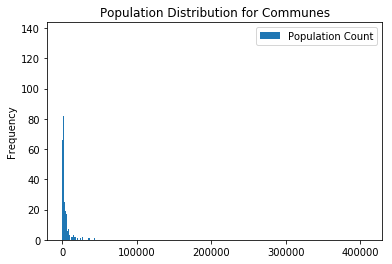

In [88]:
# Rename column names 
communes_pop = communes_pop.rename(columns = {communes_pop.columns[0]:'Communes'})
communes_pop = communes_pop.rename(columns = {communes_pop.columns[9]: 'Population Count'})

# Drop columns with no values
communes_pop = communes_pop[pd.notnull(communes_pop['Communes'])]

# Filter data to include only commune names and population count as of December 2017
communes_data = communes_pop.iloc[:, [0, 9]]
communes_with_count = communes_data[communes_data.Communes.str.startswith('......')]

# Calculate outliers using quantile 
low_q = communes_with_count["Population Count"].quantile(0.25)
high_q = communes_with_count["Population Count"].quantile(0.75)
IQR = high_q - low_q

outlier_l = communes_with_count[communes_with_count["Population Count"] < low_q - 1.5 * IQR]
outlier_h = communes_with_count[communes_with_count["Population Count"] > high_q + 1.5 * IQR]

ax = communes_with_count.plot.hist(bins = 3000, title = "Population Distribution for Communes")

outlier_h.sort_values(['Population Count'])

The histogram plot shows that the population distribution of communes is left-skewed, indicating that Switzerland has a higher number of communes with low population (rural communes) and fewer communes with high population (urban communes). 

Outliers appears to be only on population for urban communes according to log log scale plots. As listed in the dataframe above, there are in total of 215 communes that are outliers of the population distribution. 

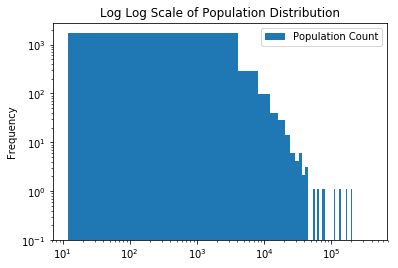

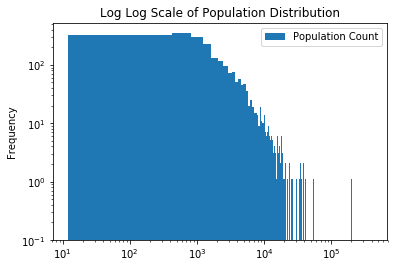

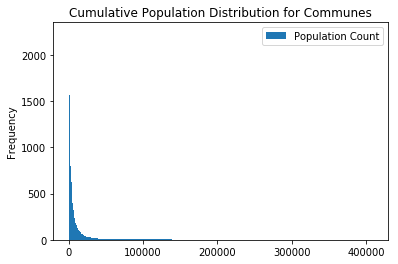

In [90]:
ax_log_bin100 = communes_with_count.plot.hist(bins = 100, bottom = 0.1, loglog = True, 
                                          title = "Log Log Scale of Population Distribution")
ax_log_bin1000 = communes_with_count.plot.hist(bins = 1000, bottom = 0.1, loglog = True, 
                                          title = "Log Log Scale of Population Distribution")

ax_cumulative = communes_with_count.plot.hist(bins = 500, bottom = 0.1, cumulative = -1, title = "Cumulative Population Distribution for Communes")


## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.